In [1]:
# Importar las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow import keras

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train[0].shape)

(28, 28)


In [4]:
# Proceso de normalizar los datos
X_train = X_train/255.
X_test = X_test/255.

# Los y no se normalizan por el hecho de que son las etiquetas

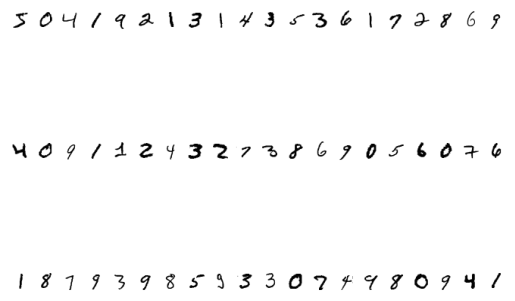

In [5]:
fig, ax = plt.subplots(3,20)
axs = ax.flatten()
for i in range(0,60):
  axs[i].imshow(X_train[i], cmap = "binary")
  axs[i].set_xticks([])
  axs[i].set_yticks([])

In [6]:
# Implementar en keras la red LetNet5
keras.backend.clear_session()
models=keras.models.Sequential([keras.layers.Conv2D(6, (5,5), strides=1, padding='valid',activation="relu", input_shape=(28,28,1)),
                                keras.layers.AveragePooling2D(pool_size= (2,2),strides=2, padding='valid'),
                                keras.layers.Conv2D(16, (5,5), strides=1, activation="relu", padding='valid'),
                                keras.layers.AveragePooling2D(pool_size= (2,2),strides=2, padding='valid'),
                                keras.layers.Flatten(),
                                keras.layers.Dense(120,activation="relu"),
                                keras.layers.Dense(80,activation="relu"),
                                keras.layers.Dense(10,activation="softmax"),
                                ])


In [7]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [8]:
models.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = models.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 18s 6ms/step - loss: 0.2619 - accuracy: 0.9220 - val_loss: 0.0975 - val_accuracy: 0.9709
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0846 - accuracy: 0.9738 - val_loss: 0.0833 - val_accuracy: 0.9744
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 0.0810 - val_accuracy: 0.9764
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0505 - accuracy: 0.9840 - val_loss: 0.0544 - val_accuracy: 0.9843
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0555 - val_accuracy: 0.9834
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0796 - val_accuracy: 0.9765
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0550 - val_accuracy

In [ ]:
q=models.predict(X_test)

In [ ]:
np.argmax(q[0])

In [ ]:
plt.imshow(X_test[0], cmap='binary')

In [ ]:
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='val_accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('Accuracy')
plt.legend ()
plt.show ()